In [184]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

In [185]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline

In [186]:
df=pd.read_csv(r'C:\Users\dear\Desktop\Data\spam.csv')

In [187]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [188]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
v1            5572 non-null object
v2            5572 non-null object
Unnamed: 2    50 non-null object
Unnamed: 3    12 non-null object
Unnamed: 4    6 non-null object
dtypes: object(5)
memory usage: 108.9+ KB


In [189]:
df['v1'].unique()

array(['ham', 'spam'], dtype=object)

In [190]:
df['Unnamed: 4'].unique()

array([nan, ' just Keep-in-touch\\" gdeve.."', 'GNT:-)"',
       ' Never comfort me with a lie\\" gud ni8 and sweet dreams"',
       ' CALL 2MWEN IM BK FRMCLOUD 9! J X\\""',
       ' one day these two will become FREINDS FOREVER!"'], dtype=object)

In [191]:
df[(df['v1']=='ham')].count()

v1            4825
v2            4825
Unnamed: 2      45
Unnamed: 3      10
Unnamed: 4       6
dtype: int64

In [192]:
df[(df['v1']=='spam')].count()

v1            747
v2            747
Unnamed: 2      5
Unnamed: 3      2
Unnamed: 4      0
dtype: int64

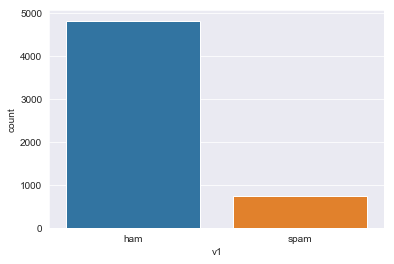

In [193]:
sns.countplot(x='v1',data=df)

In [194]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [195]:
df=df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'])

In [196]:
df['Length']=df['v2'].apply(len)

In [197]:
df.head()

,v1,v2,Length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


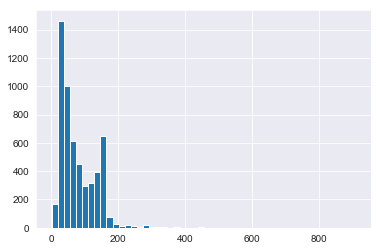

In [198]:
df['Length'].hist(bins=50)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x12D5F330>,
      dtype=object)

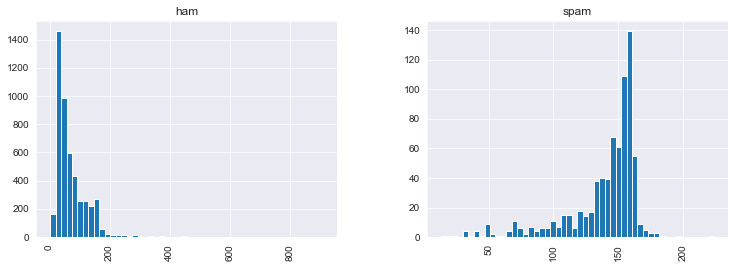

In [199]:
df.hist(column='Length',by='v1',bins=50,figsize=(12,4))

In [200]:
import string

In [201]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [202]:
import nltk

In [203]:
from nltk.corpus import stopwords

In [204]:
def text_process(mess):
    nopunc=[char for char in mess if char not in string.punctuation]
    nopunc=''.join(nopunc)
    return[word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [205]:
df.head()

,v1,v2,Length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [206]:
df['v2'].head().apply(text_process)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: v2, dtype: object

In [208]:
from sklearn.feature_extraction.text import CountVectorizer

In [209]:
bow_transform=CountVectorizer(analyzer=text_process).fit(df['v2'])

C:\Users\dear\Anaconda2\lib\site-packages\ipykernel_launcher.py:4: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  after removing the cwd from sys.path.


In [210]:
print(len(bow_transform.vocabulary_))

11304


In [211]:
messages_bow=bow_transform.transform(df['v2'])

C:\Users\dear\Anaconda2\lib\site-packages\ipykernel_launcher.py:4: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  after removing the cwd from sys.path.


l

In [212]:
messages_bow.shape

(5572, 11304)

In [213]:
messages_bow.nnz

50193

In [214]:
from sklearn.feature_extraction.text import TfidfTransformer

In [215]:
tfidf_transformer=TfidfTransformer().fit(messages_bow)

In [216]:
messages_tfidf=tfidf_transformer.transform(messages_bow)

In [217]:
from sklearn.naive_bayes import MultinomialNB

In [218]:
spam_detect_model=MultinomialNB().fit(messages_tfidf,df['v1'])

In [219]:
pred=spam_detect_model.predict(messages_tfidf)

In [225]:
pred

array(['ham', 'ham', 'spam', ..., 'ham', 'ham', 'ham'], dtype='|S4')

In [226]:
X_train,X_test,Y_train,Y_test=train_test_split(df['v2'],df['v1'],test_size=0.3,random_state=101)

In [227]:
from sklearn.pipeline import Pipeline

In [228]:
pipeline=Pipeline([
    ('bow',CountVectorizer(analyzer=text_process)),
    ('tfidf',TfidfTransformer()),
    ('classifier',MultinomialNB())
])

In [229]:
pipeline.fit(X_train,Y_train)

C:\Users\dear\Anaconda2\lib\site-packages\ipykernel_launcher.py:4: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  after removing the cwd from sys.path.


Pipeline(memory=None,
     steps=[('bow', CountVectorizer(analyzer=<function text_process at 0x130D8A70>, binary=False,
        decode_error=u'strict', dtype=<type 'numpy.int64'>,
        encoding=u'utf-8', input=u'content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preprocessor=None...         use_idf=True)), ('classifier', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [232]:
prediction=pipeline.predict(X_test)

C:\Users\dear\Anaconda2\lib\site-packages\ipykernel_launcher.py:4: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  after removing the cwd from sys.path.


In [233]:
from sklearn.metrics import classification_report

In [235]:
print(classification_report(Y_test,prediction))

              precision    recall  f1-score   support

         ham       0.96      1.00      0.98      1464
        spam       1.00      0.72      0.83       208

   micro avg       0.96      0.96      0.96      1672
   macro avg       0.98      0.86      0.91      1672
weighted avg       0.97      0.96      0.96      1672

